In [107]:
import pandas as pd
normas_data = pd.read_csv('data-normas.csv')

In [108]:
import dateparser
normas_data['fecha-publicacion'] = normas_data['fecha-publicacion'].apply(lambda x: dateparser.parse(x))
normas_data['fecha-sancion'] = normas_data['fecha-sancion'].apply(lambda x: dateparser.parse(x))

In [109]:
normas_data.to_csv('nomas-data-fechas.csv', index=False)

In [110]:
normas_data = pd.read_csv('nomas-data-fechas.csv')
normas_data['fecha-publicacion'] = pd.to_datetime(normas_data['fecha-publicacion'])
normas_data['fecha-sancion'] = pd.to_datetime(normas_data['fecha-sancion'])

In [111]:
normas_data.loc[normas_data['resumen'].str.lower().str.contains('planta permanente'), 'planta-permanente'] = 1
normas_data.loc[~normas_data['resumen'].str.lower().str.contains('planta permanente'), 'planta-permanente'] = 0

normas_data.loc[normas_data['resumen'].str.lower().str.contains('cobertura'), 'cobertura'] = 1
normas_data.loc[~normas_data['resumen'].str.lower().str.contains('cobertura'), 'cobertura'] = 0

normas_data.loc[normas_data['resumen'].str.lower().str.contains('cargos'), 'cargos'] = 1
normas_data.loc[~normas_data['resumen'].str.lower().str.contains('cargos'), 'cargos'] = 0

normas_data['cobertura-cargos'] = normas_data.apply(lambda x: 1 if x['cargos'] and x['cobertura'] else 0, axis=1)

normas_data.loc[normas_data['resumen'].str.lower().str.contains('sinep'), 'sinep'] = 1
normas_data.loc[~normas_data['resumen'].str.lower().str.contains('sinep'), 'sinep'] = 0

normas_data.loc[normas_data['resumen'].str.lower().str.contains('orden de merito'), 'orden-de-merito'] = 1
normas_data.loc[~normas_data['resumen'].str.lower().str.contains('orden de merito'), 'orden-de-merito'] = 0

In [112]:
normas_data.to_csv('normas-dic2011-oct2019-palabras.csv', index=False)

In [113]:
pp = normas_data.groupby([normas_data['fecha-publicacion'].dt.strftime('%Y/%m')]).sum()

In [114]:
pp.to_csv('meses-dic2011-oct2019-palabras.csv', index=False)

# "planta permanente"

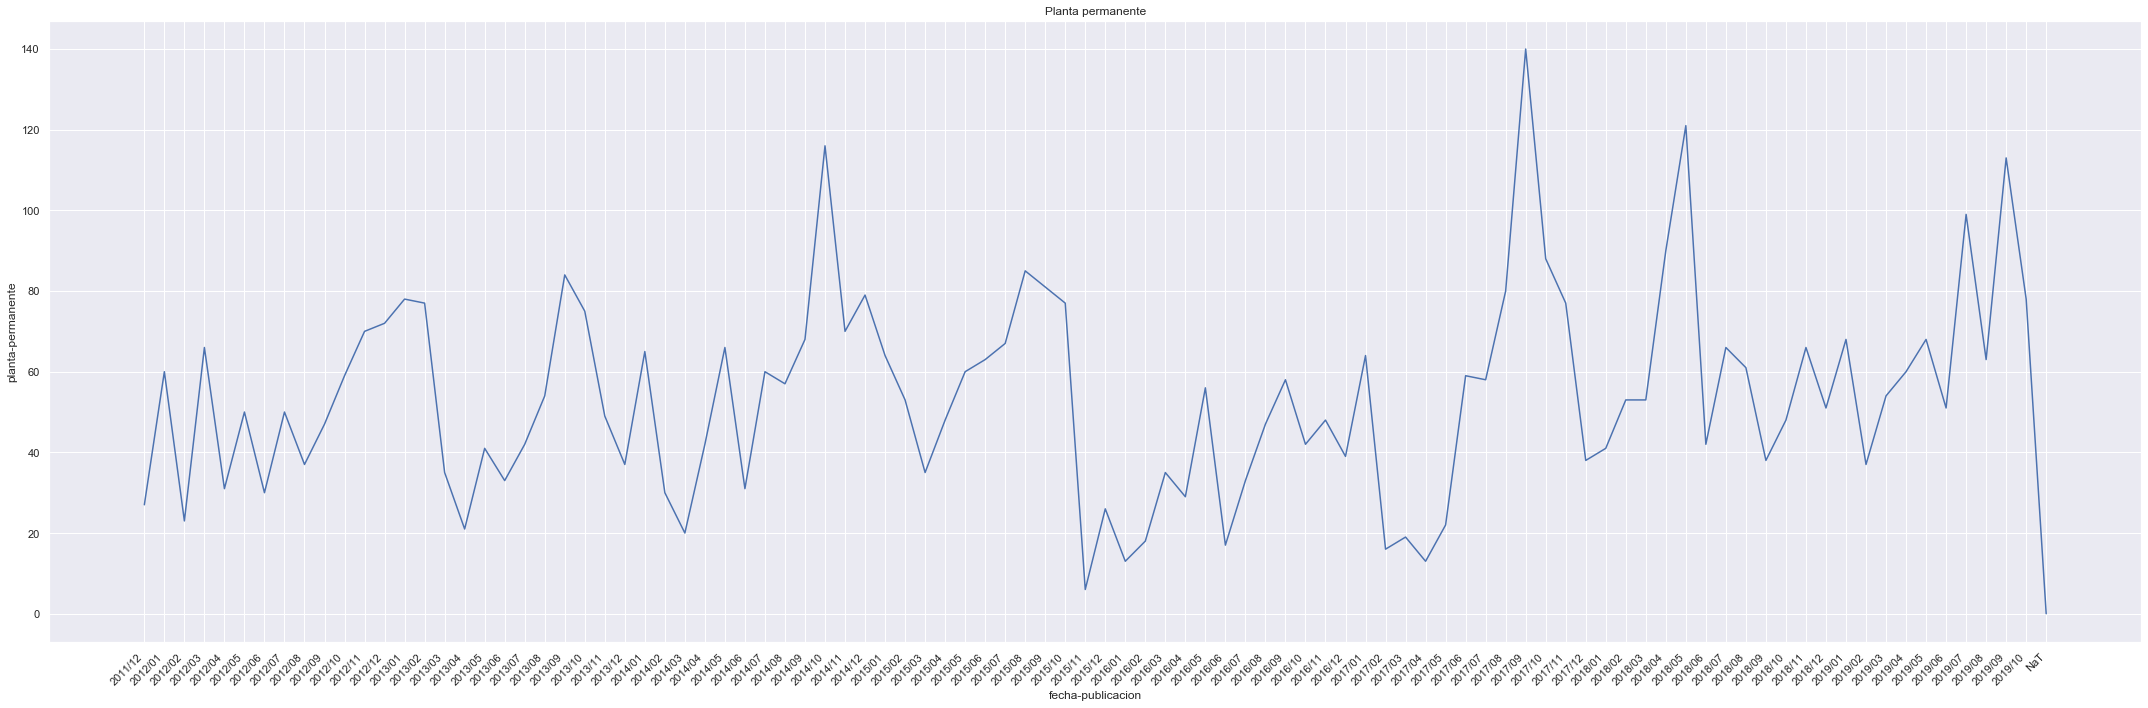

In [115]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ppx= pp.reset_index()

sns.set(rc={'figure.figsize':(30,10)})
ax = sns.lineplot(x="fecha-publicacion", y="planta-permanente", data=ppx)

ax.set_title('Planta permanente')

ax.set_xticklabels(
    labels=ppx["fecha-publicacion"],
    rotation=45, 
    horizontalalignment='right',
)

plt.tight_layout()
plt.show()


# "sinep"

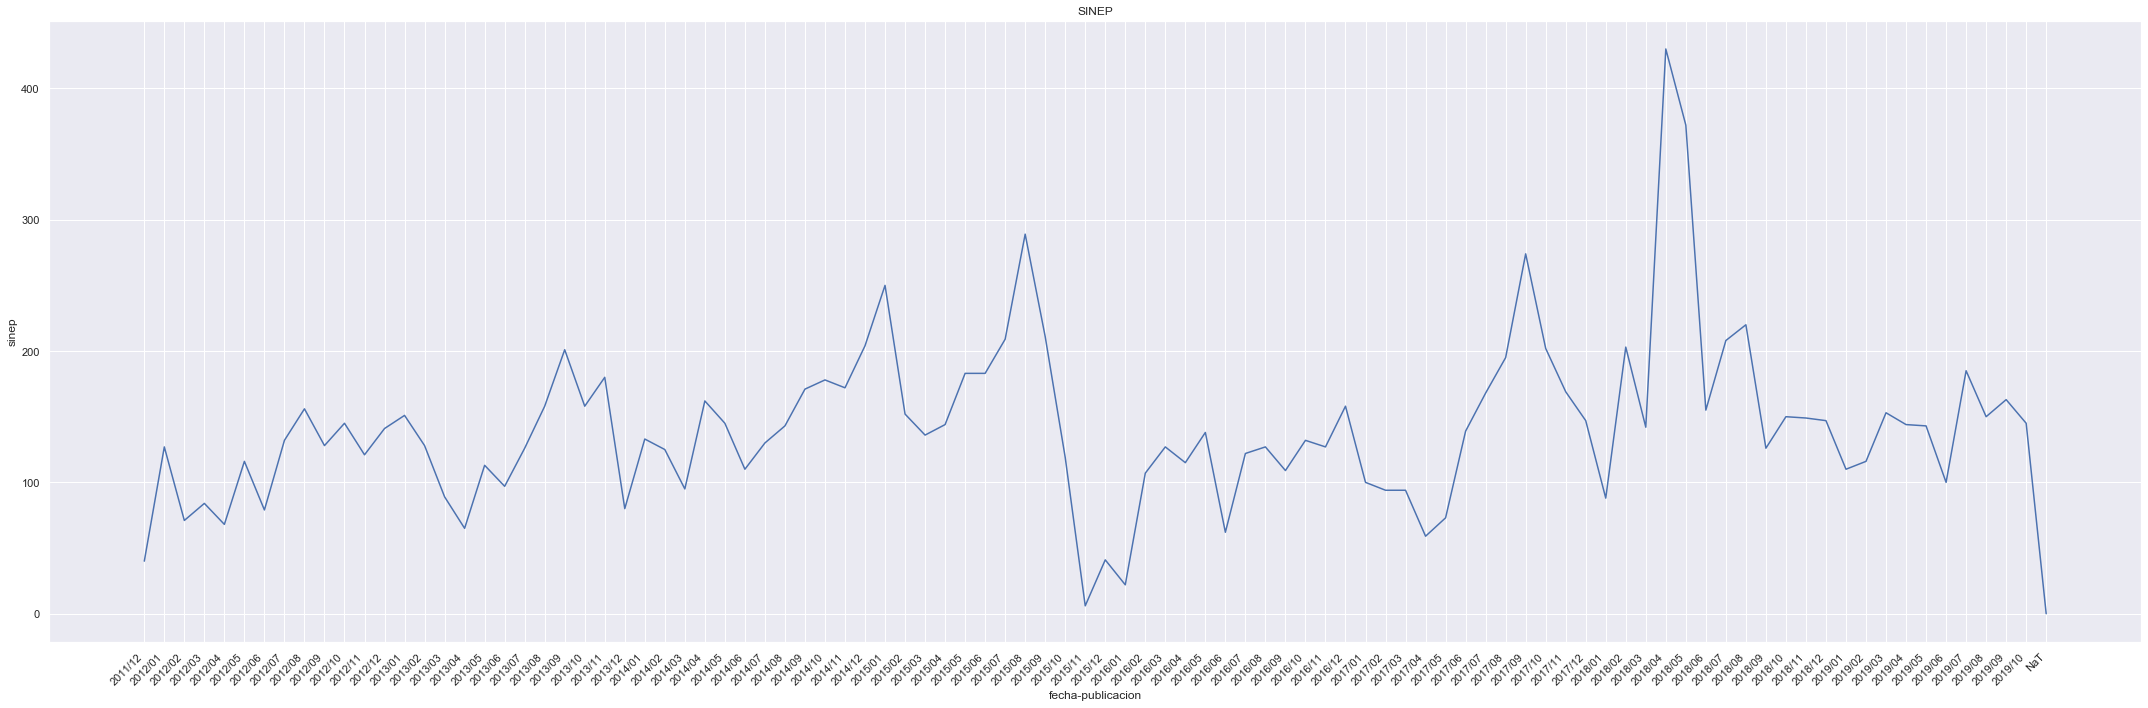

In [116]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ppx= pp.reset_index()

sns.set(rc={'figure.figsize':(30,10)})
ax = sns.lineplot(x="fecha-publicacion", y="sinep", data=ppx)

ax.set_title('SINEP')

ax.set_xticklabels(
    labels=ppx["fecha-publicacion"],
    rotation=45, 
    horizontalalignment='right',
)

plt.tight_layout()
plt.show()


# "cargos cobertura"

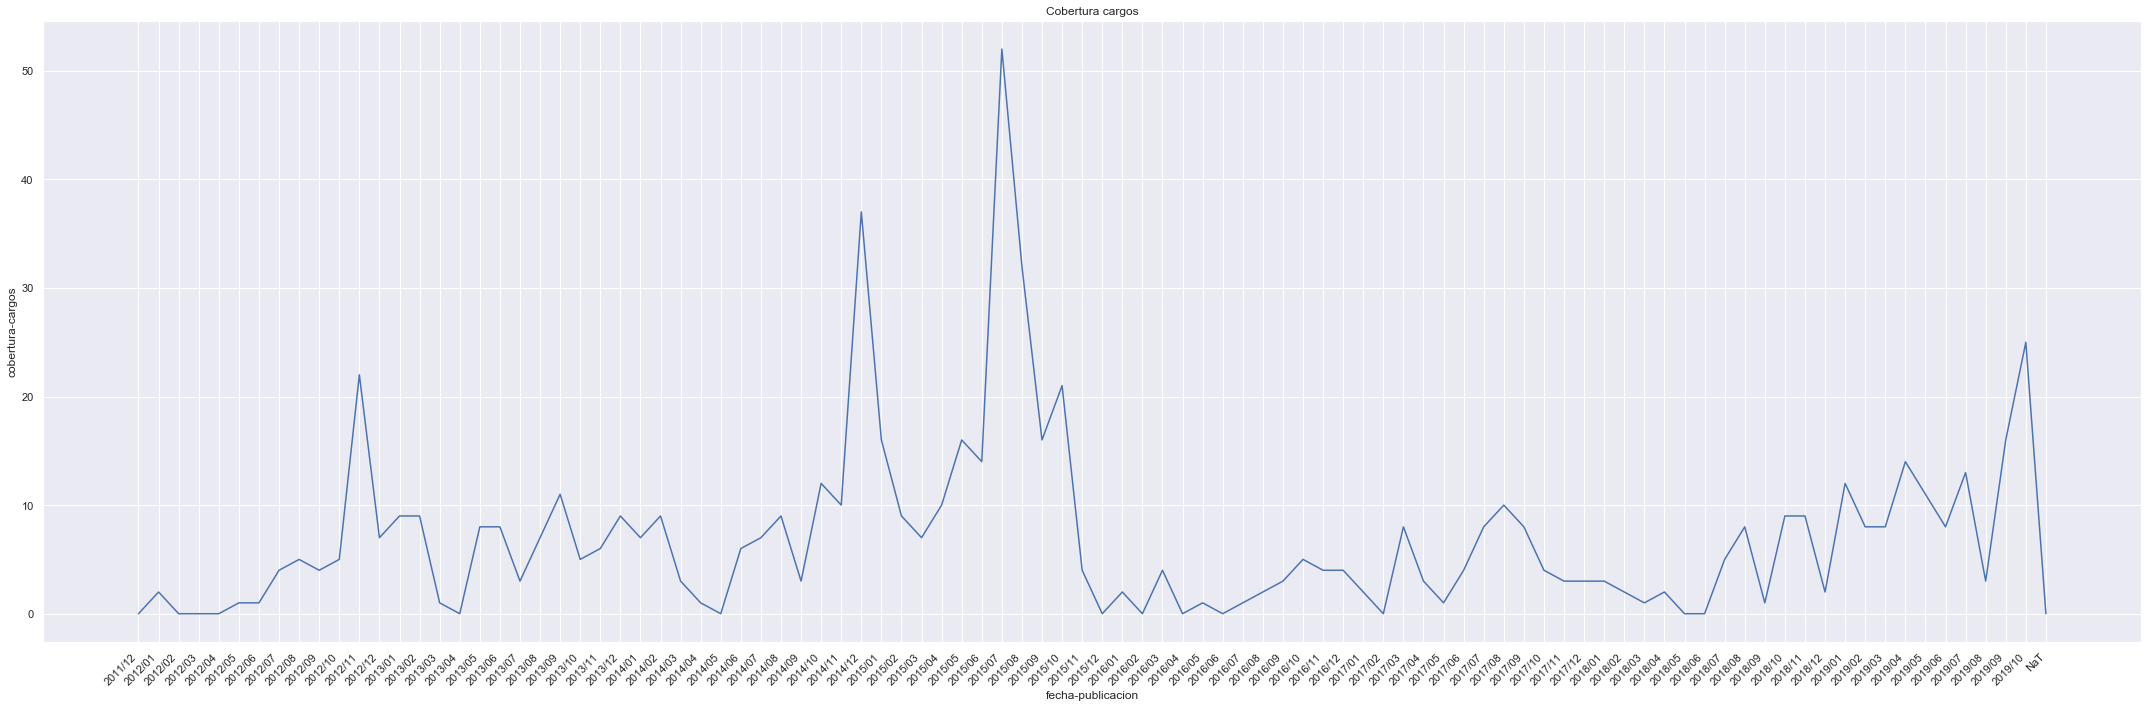

In [117]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ppx= pp.reset_index()

sns.set(rc={'figure.figsize':(30,10)})
ax = sns.lineplot(x="fecha-publicacion", y="cobertura-cargos", data=ppx)

ax.set_title('Cobertura cargos')

ax.set_xticklabels(
    labels=ppx["fecha-publicacion"],
    rotation=45, 
    horizontalalignment='right',
)

plt.tight_layout()
plt.show()


# "orden de mérito"

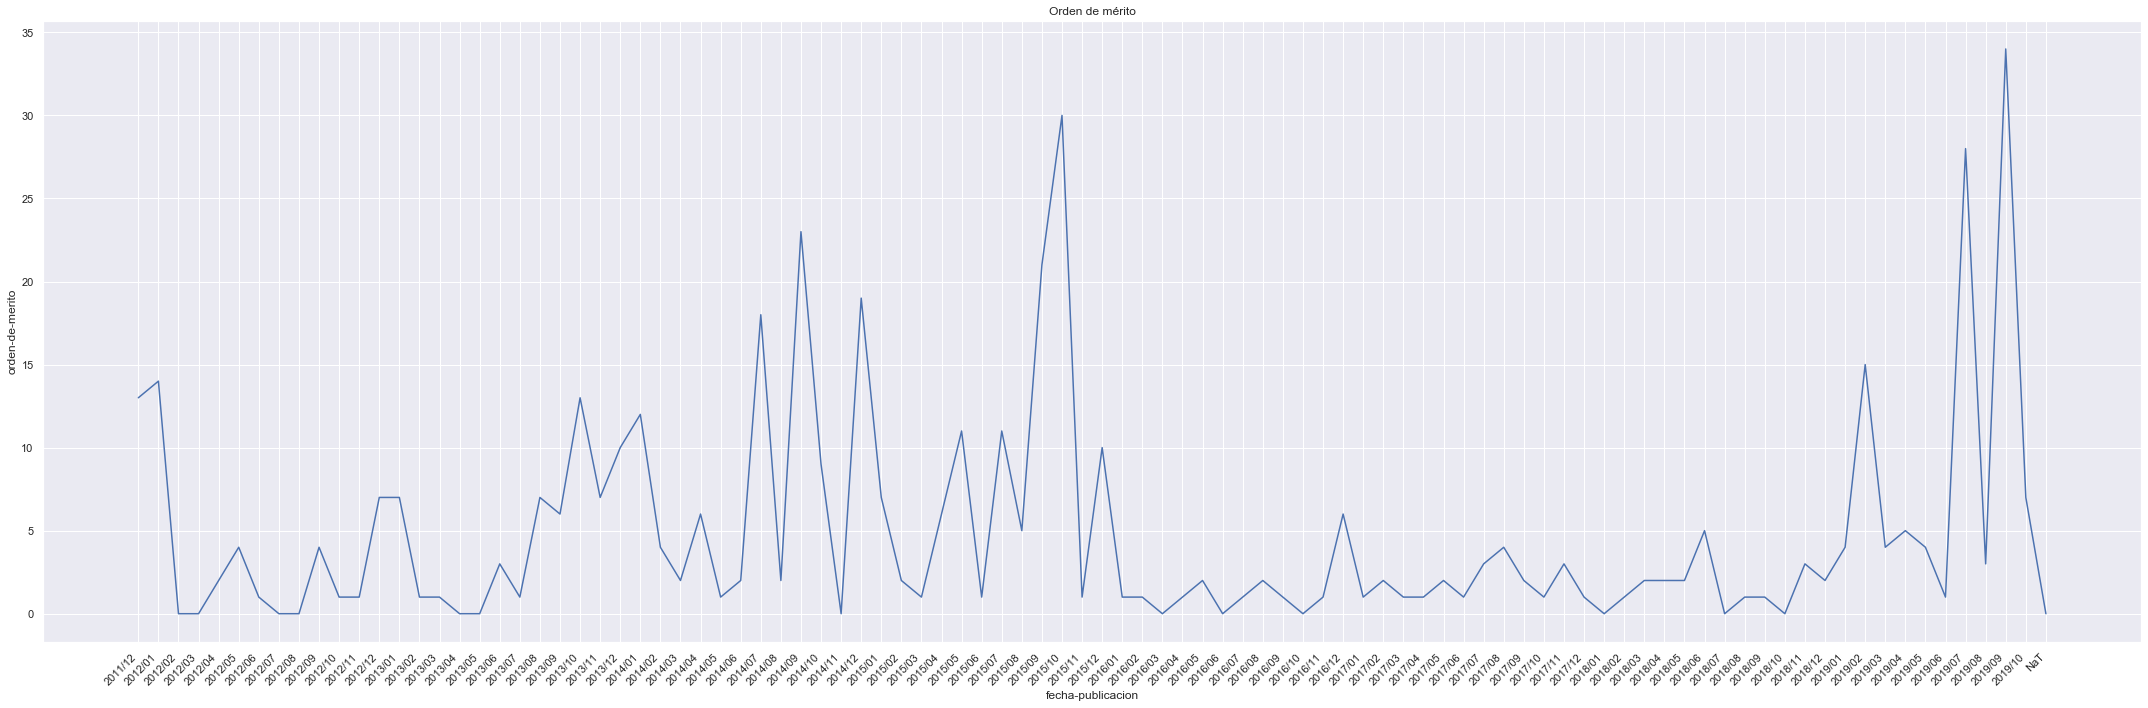

In [118]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ppx= pp.reset_index()

sns.set(rc={'figure.figsize':(30,10)})
ax = sns.lineplot(x="fecha-publicacion", y="orden-de-merito", data=ppx)

ax.set_title('Orden de mérito')

ax.set_xticklabels(
    labels=ppx["fecha-publicacion"],
    rotation=45, 
    horizontalalignment='right',
)

plt.tight_layout()
plt.show()
